# DATA602 Project 2: Linear Regression
Group 6: Elizabeth Cardosa, Jaydeep Radadia, Koushik Ajjuguttu, Stephanie Zhang

Contributions: Each group member attempted all the problems, then we worked together as a group to determine the best solutions and resolve any questions. 

Assigned 2/28/22, Due 4/3/22

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, PoissonRegressor, SGDRegressor, HuberRegressor
from sklearn.metrics import mean_squared_error

# Project Description and Objective
You will be given a dataset on hotel reviews. Reviews are integer scores between 1 and 5, where 1 is considered as the lowest, while 5 the highest. Your goal is to build a ML model to predict the reviews, as a target variable. 

In the scope of the project, you are expected to use the “sklearn.linear_model” module to perform different regression on the data and select the best model. 

**Putting everything into proper pipelines (20 pts)**
- Well-written comments and docstrings
- Well-defined functions and/or python class 

## Input
You are sourcing your data from `UCI Machine Learning Repository: Las Vegas Strip Data Set ` : https://archive.ics.uci.edu/ml/datasets/Las+Vegas+Strip

https://repositorio.iscte-iul.pt/handle/10071/13321

This data does not have missing values, but contains data type anomalies. You are expected to identify them and fix them properly. 

You are expected to use Numpy, Pandas and Sklearn for this exercise. 

In [3]:
df = pd.read_csv(r"https://archive.ics.uci.edu/ml/machine-learning-databases/00397/LasVegasTripAdvisorReviews-Dataset.csv", delimiter=";")

In [4]:
df

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,UK,15,4,8,5,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,Europe,1,October,Sunday
500,Canada,50,13,29,4,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,8,November,Thursday
501,USA,154,23,31,4,Sep-Nov,Friends,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,4,November,Thursday
502,USA,9,6,5,2,Dec-Feb,Families,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,9,December,Wednesday


## Part I, Describe and Understand the data (10pts)

You are required to draw a histogram plot of score 




In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    object
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

In [6]:
# Describe Categorical Data
df.describe(include=object).T

,count,unique,top,freq
User country,504,48,USA,217
Period of stay,504,4,Mar-May,128
Traveler type,504,5,Couples,214
Pool,504,2,YES,480
Gym,504,2,YES,480
Tennis court,504,2,NO,384
Spa,504,2,YES,384
Casino,504,2,YES,456
Free internet,504,2,YES,480
Hotel name,504,21,Circus Circus Hotel & Casino Las Vegas,24


Explore Categorical values for a given column if unclear from the nunique in describe

In [7]:
# Note: India is found twice 
df['User country'].value_counts()

USA                     217
UK                       72
Canada                   65
Australia                36
Ireland                  13
India                    11
Mexico                    8
Germany                   7
Egypt                     5
Brazil                    5
New Zeland                5
Singapore                 4
Netherlands               4
Norway                    3
Israel                    3
Malaysia                  3
Hawaii                    3
Thailand                  3
Finland                   3
Spain                     2
United Arab Emirates      2
Scotland                  2
Switzerland               2
Costa Rica                2
Kenya                     1
Korea                     1
Japan                     1
Czech Republic            1
Kuwait                    1
Taiwan                    1
Denmark                   1
Honduras                  1
Saudi Arabia              1
Iran                      1
China                     1
Jordan              

In [8]:
df['Period of stay'].value_counts()

Mar-May    128
Jun-Aug    126
Sep-Nov    126
Dec-Feb    124
Name: Period of stay, dtype: int64

In [9]:
df['Traveler type'].value_counts()

Couples     214
Families    110
Friends      82
Business     74
Solo         24
Name: Traveler type, dtype: int64

In [10]:
df['Hotel stars'].value_counts()

5      192
4      120
3       96
3,5     72
4,5     24
Name: Hotel stars, dtype: int64

In [11]:
df['Hotel name'].value_counts()

Circus Circus Hotel & Casino Las Vegas                 24
Encore at wynn Las Vegas                               24
Paris Las Vegas                                        24
Bellagio Las Vegas                                     24
The Venetian Las Vegas Hotel                           24
Wyndham Grand Desert                                   24
Hilton Grand Vacations at the Flamingo                 24
Tuscany Las Vegas Suites & Casino                      24
Marriott's Grand Chateau                               24
Hilton Grand Vacations on the Boulevard                24
The Cromwell                                           24
Excalibur Hotel & Casino                               24
Trump International Hotel Las Vegas                    24
Wynn Las Vegas                                         24
The Palazzo Resort Hotel Casino                        24
The Cosmopolitan Las Vegas                             24
Caesars Palace                                         24
Tropicana Las 

In [12]:
# Describe Numerical Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Nr. reviews,504.0,48.130952,74.996426,1.0,12.0,23.5,54.25,775.0
Nr. hotel reviews,504.0,16.023810,23.957953,0.0,5.0,9.0,18.00,263.0
Helpful votes,504.0,31.751984,48.520783,0.0,8.0,16.0,35.00,365.0
Score,504.0,4.123016,1.007302,1.0,4.0,4.0,5.00,5.0
Nr. rooms,504.0,2196.380952,1285.476807,188.0,826.0,2700.0,3025.00,4027.0
Member years,504.0,0.767857,80.692897,-1806.0,2.0,4.0,6.00,13.0


In [13]:
df['Member years'].value_counts()

 3       63
 1       61
 4       60
 5       60
 2       55
 6       41
 7       41
 0       39
 8       32
 9       21
 10      19
 11       8
 12       2
-1806     1
 13       1
Name: Member years, dtype: int64

Create histogram for the 'Score' column.

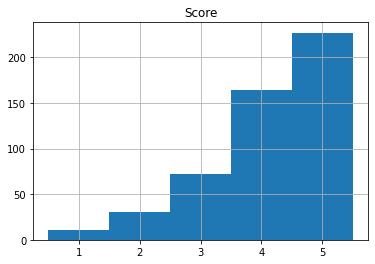

In [14]:
df.hist(column='Score',bins=range(1,7),align='left');

### Feature Descriptions


This dataframe is likely created by combining two dataframes, one of which would have contained the details of the hotels, and the other would have contained the details of the travellers/users. 
Then, these two dataframes would have been merged on user keys.
This makes each row unique to a user.

***User Specific***
1. User Country: (categorical) \
    Describes the country from which the traveller belongs.
    Note: India is listed twice. One as "India" and the other as "India ".
2. Nr. Reviews: (Numerical Discrete)\
    Describes the number of reviews posted by a user.
3. Nr. hotel reviews: (Numerical Discrete)\
    Describes the number of *hotel* reviews posted by a user.
4. Helpful Votes: (Numerical Discrete) \
    Describes the number of people who found this particular review helpful
5. Score: (Ordinal) \
    **Not Sure** The score reflects the quality of the review . 
6. Period of Stay: (Categorical) \
    This represents the time of the year during which the use stayed in the hotel. The year has been divided into four group of three months.
7. Traveler type: (Categorical) \
    Who accompanied the traveler? Five Categories.\
    Solo, Friends, Couples, Families, Business
8. User Continent: (Categorical) \
    The continent from which the user belongs.
9. Member Years: (Numerical Discrete)\
    The number of years this user has been a member, again not sure, of the hotel or this trip advisor.
10. Review Month: (Categorical)
    The month in which the review was posted. 
11. Review Day: (Categorical)
    The day of the week on which the review was posted.

***Hotel Specific***
12. Hotel Name (Categorical)\
    The name of the hotel
13. No of rooms: (Numerical Discrete can be converted into ordinal) \
    The no of rooms in the hotel
14. Hotel Stars: (Ordinal) \
    The rating of the hotel
15. Pool: (Binary) \
    Does the hotel have pool?
16. Gym: (Binary) \
    Does the hotel have gym?
17. Spa: (Binary) \
    Does the hotel have spa?
18. Casino: (Binary) \
    Does the hotel have Casino?
19. Tennis Court: (Binary) \
    Does the hotel have tennis court?
20. Free Internet: (Binary) \
    Does the hotel provides free internet?

Fortunately, there are no Null values in the dataset. \
Those features which are ordinal should not be modified.

### Based on EDA Findings, Clean the data

Fix out of range values

In [15]:
# Logic to find if the number of years is less than zero
df['Member years'].loc[(df['Member years'] < 0)] = np.nan
df['Member years'].describe().T

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


count    503.000000
mean       4.359841
std        2.928725
min        0.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       13.000000
Name: Member years, dtype: float64

Fix duplicate/formatting errors

In [16]:
# Strip erroneous spaces from the 'User country' strings (this will handle the duplicate 'India' value)
df['User country'] = df['User country'].str.strip()
df['User country'].str.strip().nunique()

47

## Part II, Feature Engineering and Properly split the data into training and testing sets (20pts)

- You are expected to perform OneHotEncode categorical features
- You are expected to generate degree-2 polynomial features of continuous variables
- You are expected to perform train test split as follows:
Training vs Testing ratio is 80% and 20% under each hotel name

For example, Hotel `Circus Circus Hotel & Casino Las Vegas` has 24 observations in total. You are expecting ~ 5 of the observations in the testing set with randomness. 

- You are expected to Normalize numerical data using MinMaxScaler, 
where min = 0, max = 1

In [17]:
numerical_features = ['Member years', 'Nr. reviews', 'Nr. hotel reviews', 'Helpful votes', 'Nr. rooms']

categorical_features = ['User country', 'User continent', 'Traveler type', 'Review month', 
                        'Review weekday', 'Period of stay', 'Hotel name', 'Pool', 'Gym', 
                        'Tennis court', 'Spa', 'Casino', 'Free internet', 'Hotel stars']

target = 'Score'

### 80%/20% Train-Test Stratified Split based on Hotel Name

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=target),df[target], test_size=0.2, stratify=df['Hotel name'], random_state=42)

In [19]:
# Verify ~20 observations in the training set (aka ~5 in the testing set)
X_train['Hotel name'].value_counts()

Treasure Island- TI Hotel & Casino                     20
Bellagio Las Vegas                                     20
Trump International Hotel Las Vegas                    20
Caesars Palace                                         20
Paris Las Vegas                                        19
The Westin las Vegas Hotel Casino & Spa                19
Circus Circus Hotel & Casino Las Vegas                 19
Excalibur Hotel & Casino                               19
Hilton Grand Vacations at the Flamingo                 19
The Cosmopolitan Las Vegas                             19
Encore at wynn Las Vegas                               19
Marriott's Grand Chateau                               19
The Venetian Las Vegas Hotel                           19
The Palazzo Resort Hotel Casino                        19
Tropicana Las Vegas - A Double Tree by Hilton Hotel    19
Monte Carlo Resort&Casino                              19
The Cromwell                                           19
Hilton Grand V

### Feature Engineering Pipeline

In [20]:
# Impute any missing values with the mean
# Scale data between 0 and 1
# Generate degree-2 Polynomial features
numeric_pipeline = Pipeline(steps=[  
    ('impute', SimpleImputer(strategy='mean')),     
    ('scale', MinMaxScaler()),     
    ('polynomial',PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)), 
])

In [21]:
# Impute any missing values with the most frequently seen value
# OneHotEncode categorical features
categorical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(drop='first',handle_unknown = 'ignore')) 
])

In [22]:
pre_processor = ColumnTransformer(transformers=[
    ('numeric', numeric_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features),
])

### Perform feature engineering on training data

Confirming the shape of the transformed features from the feature engineering pipeline 

In [23]:
X_train_proc = pre_processor.fit_transform(X_train)

In [24]:
X_test_proc = pre_processor.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


In [25]:
X_train_proc.shape

(403, 122)

In [26]:
X_test_proc.shape

(101, 122)

## Part III, Model Fitting, Evaluation and Selection (30 pts) & Part IV, Prediction and Prediction Summary (20 pts)

You are expected to fit 3 separate models
- LinearRegression with MSE, 
- Linear Regression with MAE,
- Poisson Regression (see `https://towardsdatascience.com/machine-learning-mini-project-6f67e511ffd3 `)

To evaluate your model, you need to generate predictions that are inline with the target format. Write a function that maps your model prediction to the target format. 
Evaluate the models using mean squared error based on testing data.
In this project, you do not have any hyperparameter to tune, so no cross validation is needed.

In [27]:
# Function to bound predictions as integers between 1 and 5 
def prediction_formatter(X):
  x = []
  for i in X: 
    if round(i) > 5:
      x.append(5)
    elif round(i) < 1:
      x.append(1)
    else:
      x.append(round(i))
  return x

### LinearRegression

In [28]:
lin_reg_pipeline = Pipeline(steps=[
    ('preprocess', pre_processor),
    ('linearmodel', LinearRegression(fit_intercept=False)) 
])

In [29]:
lin_reg_pipeline.fit(X_train, y_train);

In [30]:
y_hat_train = prediction_formatter(lin_reg_pipeline.predict(X_train))
print("Training MSE:", mean_squared_error(y_train, y_hat_train))

Training MSE: 0.7543424317617866


In [31]:
y_hat_test = prediction_formatter(lin_reg_pipeline.predict(X_test))
print("Testing MSE:", mean_squared_error(y_test, y_hat_test))

Testing MSE: 1.2574257425742574


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


Histogram comparing distribution of predicted vs actual values


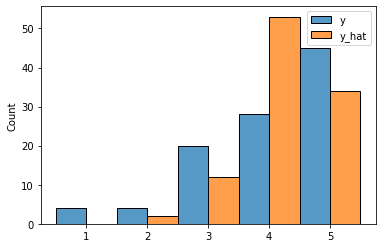

In [32]:
sns.histplot({'y':y_test, 'y_hat':y_hat_test},discrete=True, multiple='dodge')

### MAE - SGDRegressor w/ loss='epsilon_insensitive', epsilon=0, set alpha=0 (so there is no regularization)
https://scikit-learn.org/stable/modules/sgd.html#sgd-mathematical-formulation

In [33]:
lin_reg_mae_pipeline = Pipeline(steps=[
    ('preprocess', pre_processor),
    ('sgd', SGDRegressor(loss='epsilon_insensitive', epsilon=0, alpha=0, fit_intercept=False))
])

In [34]:
lin_reg_mae_pipeline.fit(X_train, y_train);

In [35]:
y_hat_mae_train = prediction_formatter(lin_reg_mae_pipeline.predict(X_train))
print("Training MSE:", mean_squared_error(y_train, y_hat_mae_train))

Training MSE: 0.9429280397022333


In [36]:
y_hat_mae_test = prediction_formatter(lin_reg_mae_pipeline.predict(X_test))
print("Testing MSE:", mean_squared_error(y_test, y_hat_mae_test))

Testing MSE: 1.3267326732673268


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


Histogram comparing distribution of predicted vs actual values


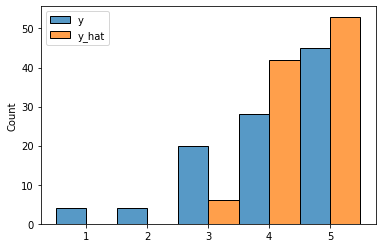

In [37]:
sns.histplot({'y':y_test, 'y_hat':y_hat_mae_test},discrete=True, multiple='dodge')

### Poisson Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PoissonRegressor.html

In [38]:
lin_reg_poisson_pipeline = Pipeline(steps=[
    ('preprocess', pre_processor),
    ('poisson', PoissonRegressor(fit_intercept=False, alpha=0, max_iter=10000))
])

In [39]:
lin_reg_poisson_pipeline.fit(X_train, y_train);

In [40]:
y_hat_poisson_train = prediction_formatter(lin_reg_poisson_pipeline.predict(X_train))
print("Training MSE:", mean_squared_error(y_train, y_hat_poisson_train))

Training MSE: 0.7617866004962779


In [41]:
y_hat_poisson_test = prediction_formatter(lin_reg_poisson_pipeline.predict(X_test))
print("Testing MSE:", mean_squared_error(y_test, y_hat_poisson_test))

Testing MSE: 1.306930693069307


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


Histogram comparing distribution of predicted vs actual values


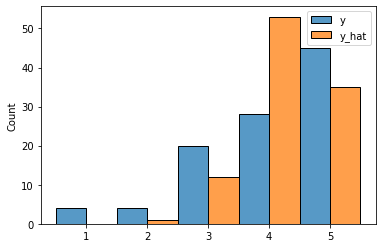

In [42]:
sns.histplot({'y':y_test, 'y_hat':y_hat_poisson_test},discrete=True, multiple='dodge')

### For Fun: Weighted Least Squares to try and get predictions from each 'score' 
Using the class weight formula (wj=n_samples / (n_classes * n_samples_j) from the source:
https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/

In [43]:
# y_train_weights = [1 - (y_train.value_counts()[x]/len(y_train)) for x in y_train] - this function has lower error,
# but still does not predict 1 (likely less overfit than the one below though), ideally would play around with weighting functions to lower testing error 
y_train_weights = [len(y_train)/(5*y_train.value_counts()[x]) for x in y_train]

In [44]:
lin_reg_weighted_pipeline = Pipeline(steps=[
    ('preprocess', pre_processor),
    ('linearmodel', LinearRegression(fit_intercept=False)) 
])

In [45]:
lin_reg_weighted_pipeline.fit(X_train, y_train, linearmodel__sample_weight=y_train_weights);

In [46]:
y_hat_weighted_train = prediction_formatter(lin_reg_weighted_pipeline.predict(X_train))
print("Training MSE:", mean_squared_error(y_train, y_hat_weighted_train))

Training MSE: 1.2580645161290323


In [47]:
y_hat_weighted_test = prediction_formatter(lin_reg_weighted_pipeline.predict(X_test))
print("Testing MSE:", mean_squared_error(y_test, y_hat_weighted_test))

Testing MSE: 1.9603960396039604


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


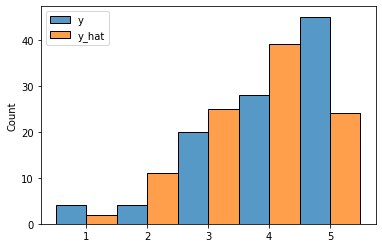

In [48]:
sns.histplot({'y':y_test, 'y_hat':y_hat_weighted_test},discrete=True, multiple='dodge')

### Predict the target on testing data set
Do a boxplot (distribution plot by X) where X is the target, Y is the prediction.

In [49]:
df = pd.DataFrame({'MSE':y_hat_test,'MAE':y_hat_mae_test,'Poisson':y_hat_poisson_test},index=y_test)

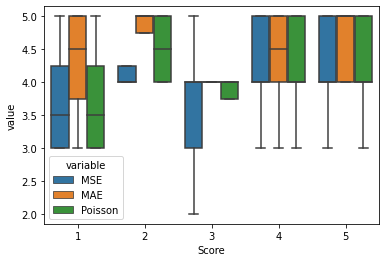

In [50]:
sns.boxplot(x='Score',y='value',data=pd.melt(df.reset_index(), id_vars='Score',value_vars=['MSE','MAE','Poisson']), showfliers=False, hue='variable') # use hue and showfliers parameters